In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo

# Caricamento dei dati
dati_results = pd.read_csv('data/results.csv')
dati_shootouts = pd.read_csv('data/shootouts.csv')
dati_goalscorers = pd.read_csv('data/goalscorers.csv')
dati_giocatori_euro24 = pd.read_csv('data/euro2024_players.csv')
dati_fifaRank = pd.read_csv('data/fifa_UEFA_rank.csv')
#style
plt.style.use('seaborn-v0_8-pastel')

In [3]:
# Fusione dei dati e pulizia
dati_shootouts['shootout'] = True
results = pd.merge(dati_results, dati_shootouts, how = 'outer', on = ['date', 'home_team', 'away_team'])
results.dropna(subset=['tournament'], inplace=True)
results.dropna(subset=['home_score'], inplace=True)
results['date'] = pd.to_datetime(results['date'])
results['Year'] = pd.DatetimeIndex(results['date']).year
results.loc[results['home_score'] > results['away_score'], 'winner'] = results['home_team']
results.loc[results['home_score'] < results['away_score'], 'winner'] = results['away_team']
results['winner'] = results['winner'].fillna('Draw')
results['shootout'] = results['shootout'].fillna(False)
year_results = results.pop('Year')
results.insert(0, 'Year', year_results)


## La percentuale di ciascun torneo nelle competizioni internazionali 

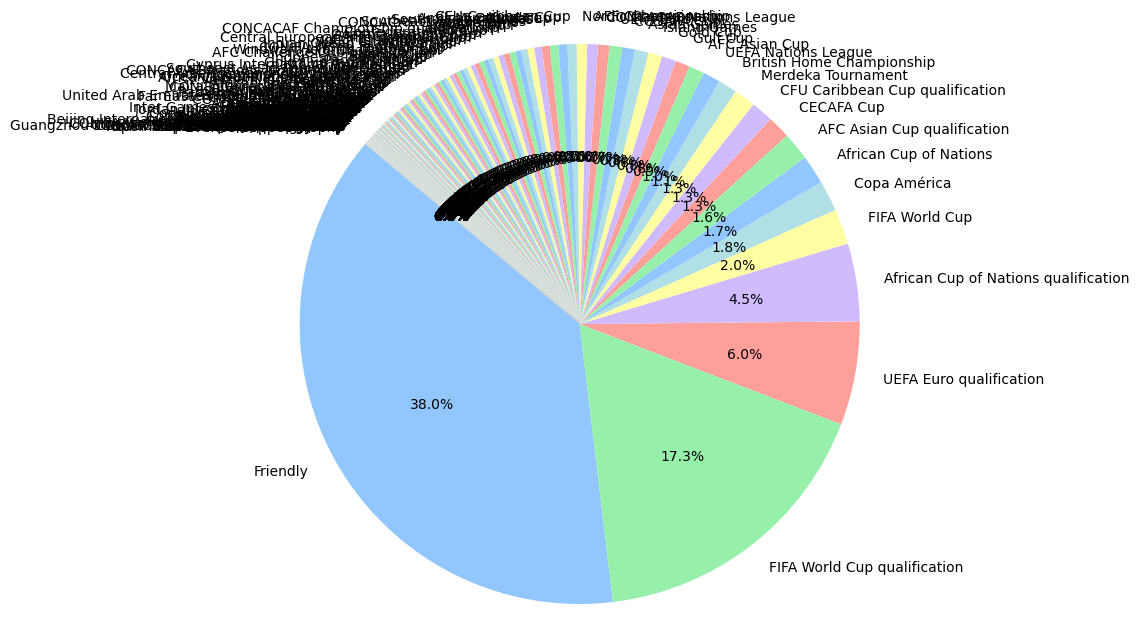

In [6]:
tournament_counts = results['tournament'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(tournament_counts, labels=tournament_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.show()

##  Il numero di partite per anno dal 1984

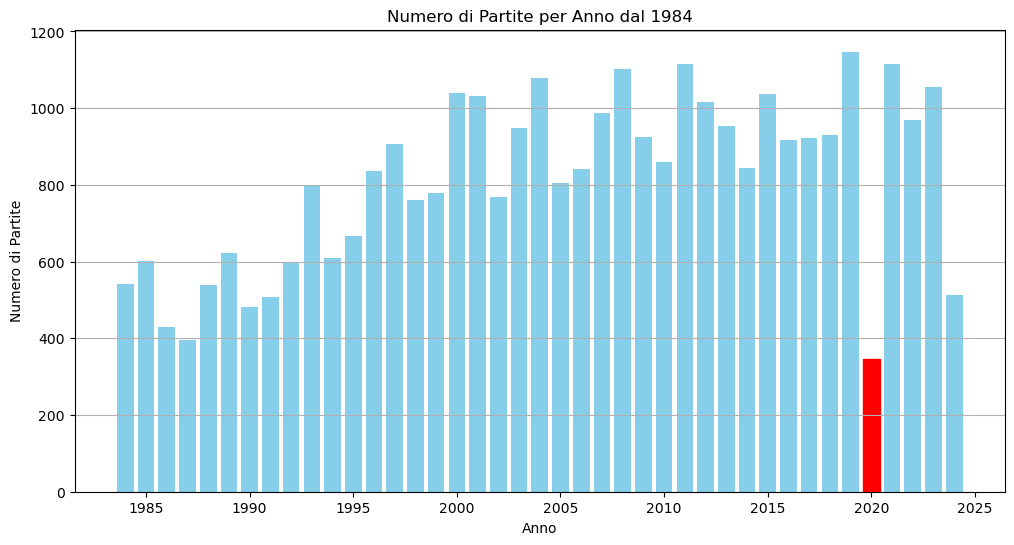

In [9]:
dati_1984_2024 = results[results['Year'] >= 1984]
matches_anno_num = dati_1984_2024['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(matches_anno_num.index, matches_anno_num.values, color='skyblue')
bars[matches_anno_num.index.get_loc(2020)].set_color('red')
plt.xlabel('Anno')
plt.ylabel('Numero di Partite')
plt.title('Numero di Partite per Anno dal 1984')
plt.grid(axis='y')
plt.show()

## Tendenza dei Gol Segnati nei Diversi Tornei di Calcio


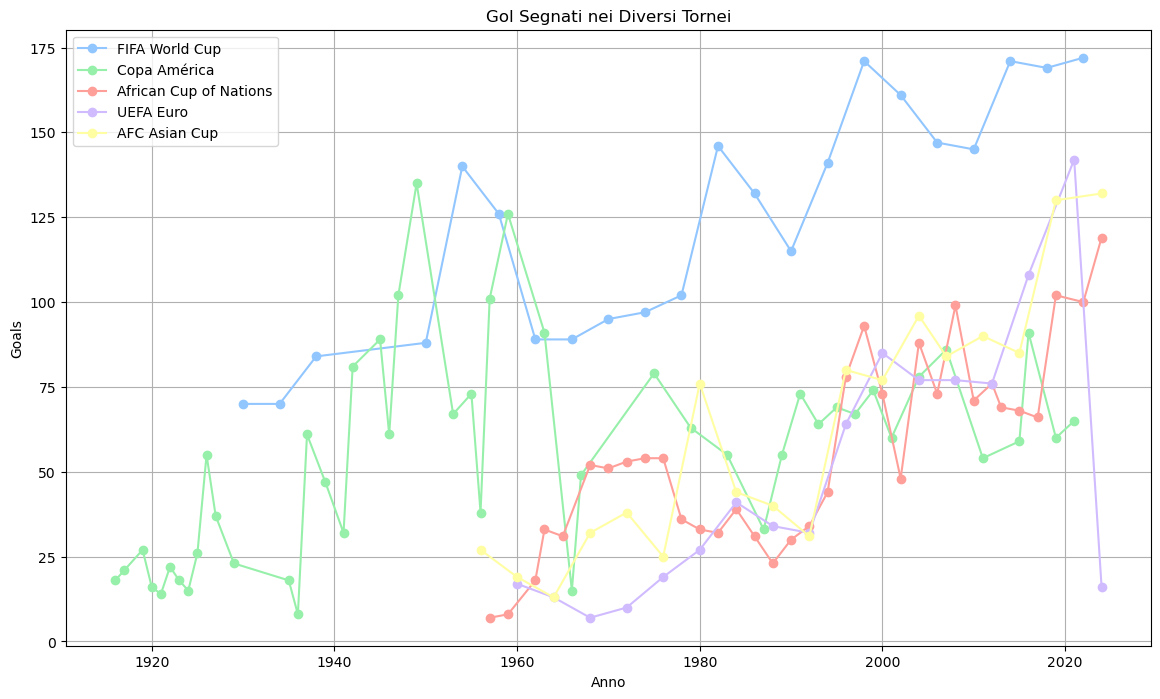

In [12]:
# Raccolta dei dati per i diversi tornei
worldcup = results.loc[results['tournament'] == 'FIFA World Cup']
copaamerica = results.loc[results['tournament'] == 'Copa América']
afcon = results.loc[results['tournament'] == 'African Cup of Nations']
euro = results.loc[results['tournament'] == 'UEFA Euro']
asiancup = results.loc[results['tournament'] == 'AFC Asian Cup']

# Calcolo del totale dei gol segnati per ogni torneo per anno
worldcup_goals = worldcup.groupby('Year')[['home_score', 'away_score']].sum()
copaamerica_goals = copaamerica.groupby('Year')[['home_score', 'away_score']].sum()
afcon_goals = afcon.groupby('Year')[['home_score', 'away_score']].sum()
euro_goals = euro.groupby('Year')[['home_score', 'away_score']].sum()
asiancup_goals = asiancup.groupby('Year')[['home_score', 'away_score']].sum()

# Calcolo del totale dei gol (casa + trasferta) per ogni torneo per anno
worldcup_goals['goals_score'] = worldcup_goals['home_score'] + worldcup_goals['away_score']
copaamerica_goals['goals_score'] = copaamerica_goals['home_score'] + copaamerica_goals['away_score']
afcon_goals['goals_score'] = afcon_goals['home_score'] + afcon_goals['away_score']
euro_goals['goals_score'] = euro_goals['home_score'] + euro_goals['away_score']
asiancup_goals['goals_score'] = asiancup_goals['home_score'] + asiancup_goals['away_score']



#Creazione del grafico
plt.figure(figsize=(14, 8))

plt.plot(worldcup_goals.index, worldcup_goals['goals_score'], marker='o', label='FIFA World Cup')
plt.plot(copaamerica_goals.index, copaamerica_goals['goals_score'], marker='o', label='Copa América')
plt.plot(afcon_goals.index, afcon_goals['goals_score'], marker='o', label='African Cup of Nations')
plt.plot(euro_goals.index, euro_goals['goals_score'], marker='o', label='UEFA Euro')
plt.plot(asiancup_goals.index, asiancup_goals['goals_score'], marker='o', label='AFC Asian Cup')

plt.title('Gol Segnati nei Diversi Tornei')
plt.xlabel('Anno')
plt.ylabel('Goals')
plt.legend()
plt.grid(True)
plt.show()

## Le squadre che hanno vinto i campionati nei cinque principali tornei internazionali

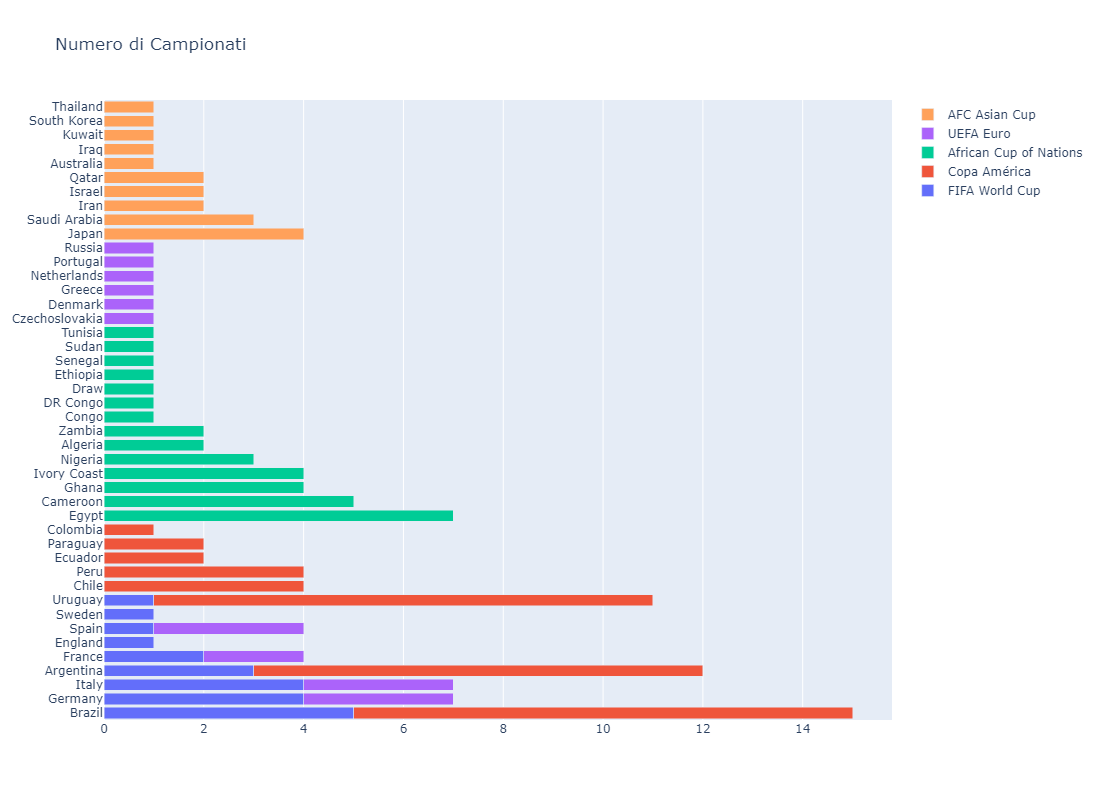

In [15]:
#Creazione di DataFrame per le finali dei rispettivi tornei
worldcup_groupby = worldcup.groupby('Year')
worldcup_final = worldcup_groupby.last()

copaamerica_groupby = copaamerica.groupby('Year')
copaamerica_final = copaamerica_groupby.last()

afcon_groupby = afcon.groupby('Year')
afcon_final = afcon_groupby.last()

euro_groupby = euro.groupby('Year')
euro_final = euro_groupby.last()

asiancup_groupby = asiancup.groupby('Year')
asiancup_final = asiancup_groupby.last()

#Risoluzione di alcuni errori nei dati delle finali
indexNames = copaamerica_final[copaamerica_final['winner'] == 'Draw'].index
copaamerica_final.drop(indexNames, inplace = True)

#Creazione di dataframe per identificare i vincitori e quante volte hanno vinto il torneo.
worldcup_champions = pd.DataFrame(worldcup_final['winner'].value_counts().sort_index())
copaamerica_champions = pd.DataFrame(copaamerica_final['winner'].value_counts().sort_index())
afcon_champions = pd.DataFrame(afcon_final['winner'].value_counts().sort_index())
euro_champions = pd.DataFrame(euro_final['winner'].value_counts().sort_index())
asiancup_champions = pd.DataFrame(asiancup_final['winner'].value_counts().sort_index())

# Reset degli indici
worldcup_champions.reset_index(drop=False, inplace=True)
copaamerica_champions.reset_index(drop=False, inplace=True)
afcon_champions.reset_index(drop=False, inplace=True)
euro_champions.reset_index(drop=False, inplace=True)
asiancup_champions.reset_index(drop=False, inplace=True)

# Ordinamento dei dati dei campioni in base al numero di vittorie
worldcup_champions_sorted = worldcup_champions.sort_values(by='count', ascending=False)
copaamerica_champions_sorted = copaamerica_champions.sort_values(by='count', ascending=False)
afcon_champions_sorted = afcon_champions.sort_values(by='count', ascending=False)
euro_champions_sorted = euro_champions.sort_values(by='count', ascending=False)
asiancup_champions_sorted = asiancup_champions.sort_values(by='count', ascending=False)

#Creazione del grafico
fig_trophies = go.Figure()

fig_trophies.add_trace(go.Bar(y=worldcup_champions_sorted['winner'], x=worldcup_champions_sorted['count'], orientation='h', name='FIFA World Cup'))
fig_trophies.add_trace(go.Bar(y=copaamerica_champions_sorted['winner'], x=copaamerica_champions_sorted['count'], orientation='h', name='Copa América'))
fig_trophies.add_trace(go.Bar(y=afcon_champions_sorted['winner'], x=afcon_champions_sorted['count'], orientation='h', name='African Cup of Nations'))
fig_trophies.add_trace(go.Bar(y=euro_champions_sorted['winner'], x=euro_champions_sorted['count'], orientation='h', name='UEFA Euro'))
fig_trophies.add_trace(go.Bar(y=asiancup_champions_sorted['winner'], x=asiancup_champions_sorted['count'], orientation='h', name='AFC Asian Cup'))

fig_trophies.update_layout(title=' Numero di Campionati', barmode='stack')
fig_trophies.update_layout(height=800)

pyo.iplot(fig_trophies)

## Le percentuali di vittoria in casa e in trasferta delle 14 migliori squadre

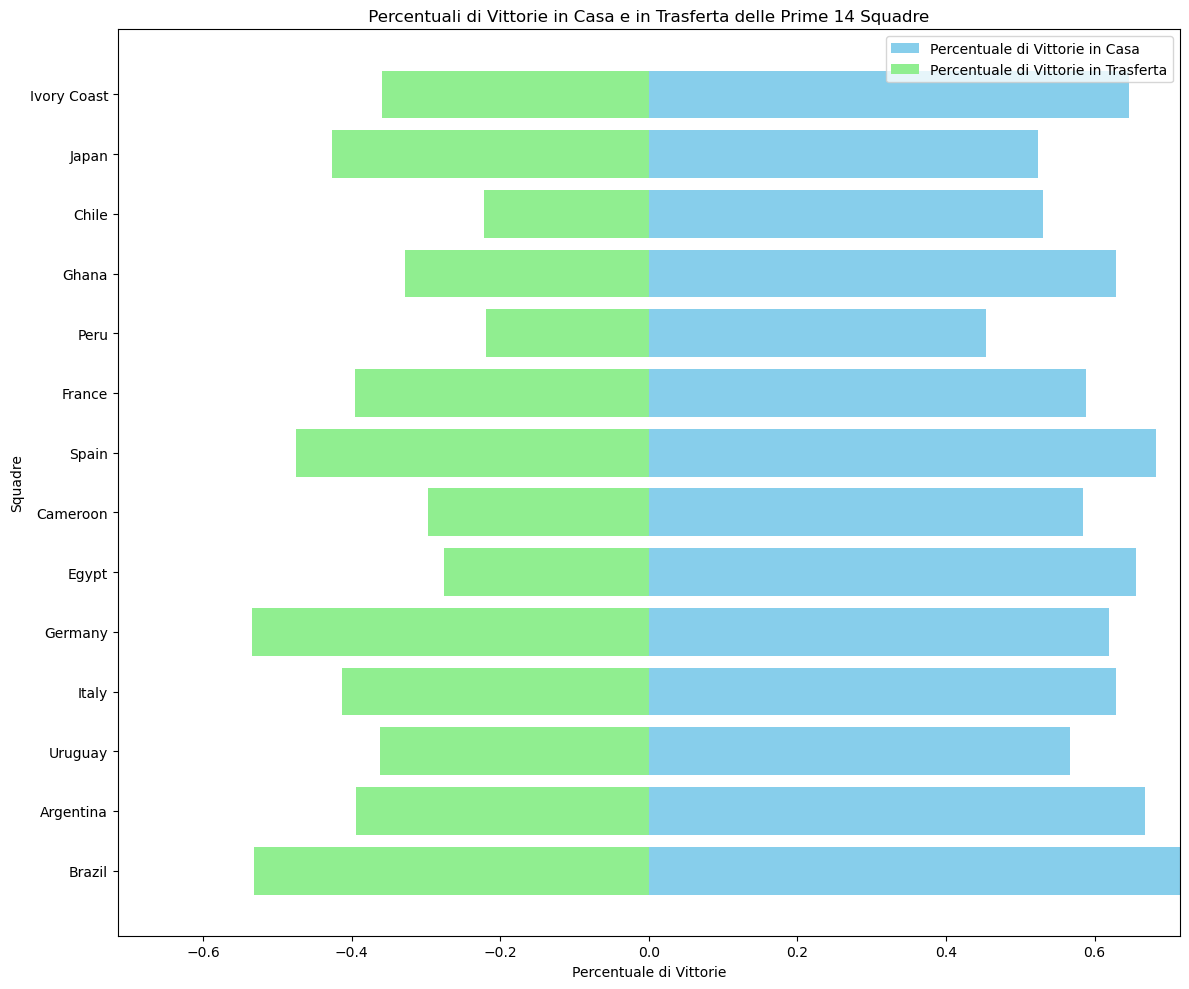

In [18]:
teams = ['Brazil', 'Argentina', 'Uruguay', 'Italy', 'Germany', 'Egypt', 'Cameroon', 'Spain', 'France', 'Peru', 'Ghana', 'Chile', 'Japan', 'Ivory Coast']

# Funzione per calcolare i risultati delle squadre
def calcolare_results(df, squadre, goals, gol_subiti):
    squadre_results = df.groupby(squadre).apply(lambda x: pd.Series({
        'win': (x[goals] > x[gol_subiti]).sum(),
        'draw': (x[goals] == x[gol_subiti]).sum(),
        'losse': (x[goals] < x[gol_subiti]).sum(),
        'tutti_matches': x.shape[0]
    }))
    squadre_results ['win_rate'] =squadre_results['win']/squadre_results['tutti_matches']
    return squadre_results

# Calcolo dei risultati in casa e in trasferta
home_results = calcolare_results(results, 'home_team', 'home_score', 'away_score')
away_results = calcolare_results(results, 'away_team', 'away_score', 'home_score')

# Filtraggio dei risultati per le squadre
home_results_filter= home_results.loc[teams]
away_results_filter= away_results.loc[teams]

#Creazione del grafico
fig, ax = plt.subplots(figsize=(12, 10))

ax.barh(home_results_filter.index, home_results_filter['win_rate'], color='skyblue', label='Percentuale di Vittorie in Casa')
ax.barh(away_results_filter.index, -away_results_filter['win_rate'], color='lightgreen', label='Percentuale di Vittorie in Trasferta')

ax.set_xlabel('Percentuale di Vittorie')
ax.set_ylabel('Squadre')
ax.set_title(' Percentuali di Vittorie in Casa e in Trasferta delle Prime 14 Squadre ')
ax.legend()

max_rate = max(home_results_filter['win_rate'].max(), away_results_filter['win_rate'].max())
ax.set_xlim(-max_rate, max_rate)

plt.tight_layout()
plt.show()

## Impatto delle partite in casa e in trasferta sulle vottorie

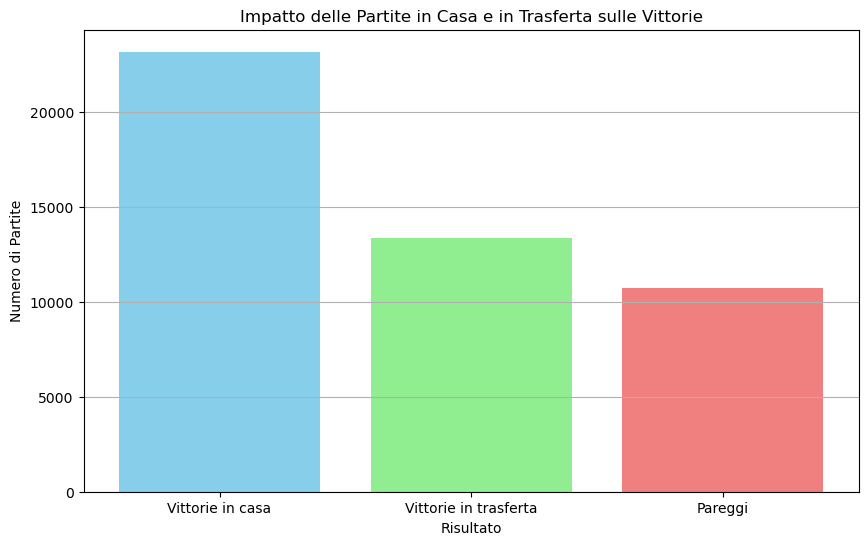

In [21]:
results['home_win'] = results['home_score'] > results['away_score']
results['away_win'] = results['away_score'] > results['home_score']
results['draw'] = results['home_score'] == results['away_score']

home_wins = results['home_win'].sum()
away_wins = results['away_win'].sum()
draws = results['draw'].sum()

labels = ['Vittorie in casa', 'Vittorie in trasferta', 'Pareggi']
counts = [home_wins, away_wins, draws]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Risultato')
plt.ylabel('Numero di Partite')
plt.title('Impatto delle Partite in Casa e in Trasferta sulle Vittorie')
plt.grid(axis='y')

plt.show()

## Il maggior numero di gol segnati nel primo e nel secondo tempo dalle squadre

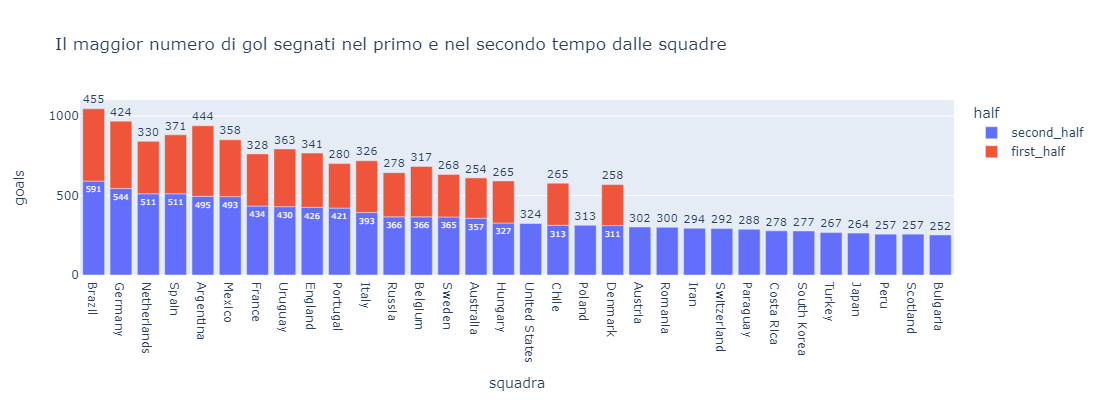

In [24]:
dati_goalscorers['half'] = dati_goalscorers['minute'].apply(lambda x: 'first_half' if (x < 45.0) else 'second_half')
team_goal_in_halfs = dati_goalscorers.groupby(['team','half'])[['scorer']].agg('count').sort_values('scorer',ascending=False).reset_index().rename(columns={'scorer':'goals','team':'squadra'})
fig = px.bar(team_goal_in_halfs[:50],
             x='squadra', 
             y='goals',
             color="half",
             title=" Il maggior numero di gol segnati nel primo e nel secondo tempo dalle squadre",
             text_auto=True,
            height=400)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()


## Il maggior numero di gol segnati nella prima e nella seconda metà dai singoli giocatori 


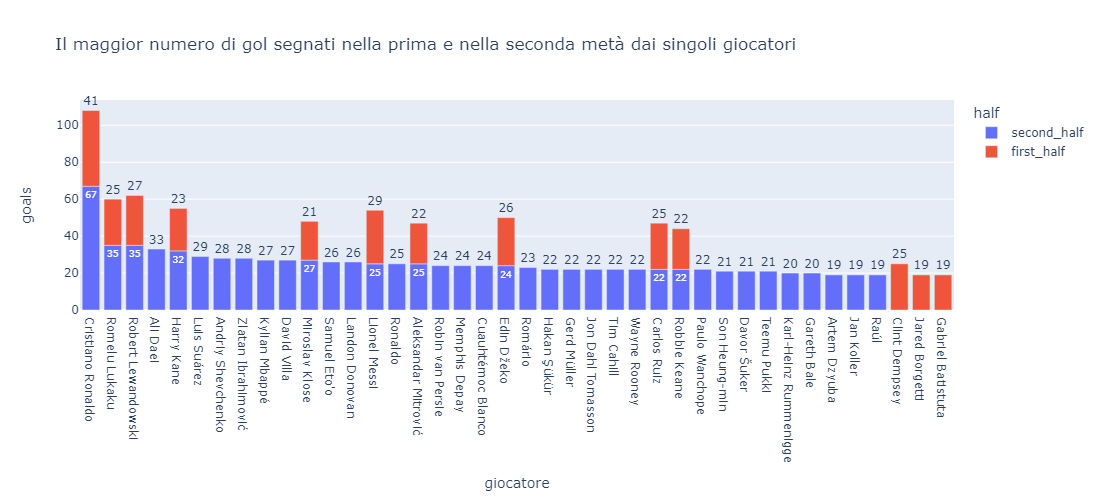

In [27]:
scorer_goal_in_halfs = pd.DataFrame(dati_goalscorers.groupby(['scorer','half'])[['scorer']].agg('count')).rename(columns={'scorer':'goals'}).sort_values('goals',ascending=False).reset_index().rename(columns={'scorer':'giocatore'})

fig = px.bar(scorer_goal_in_halfs[:50],
             x='giocatore', 
             y='goals',
             color="half",
             title="Il maggior numero di gol segnati nella prima e nella seconda metà dai singoli giocatori ",
             text_auto=True,
            height=500)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()


## Distribuzione dei Minuti di Gol per i Primi 10 Marcatori


<Figure size 1200x800 with 0 Axes>

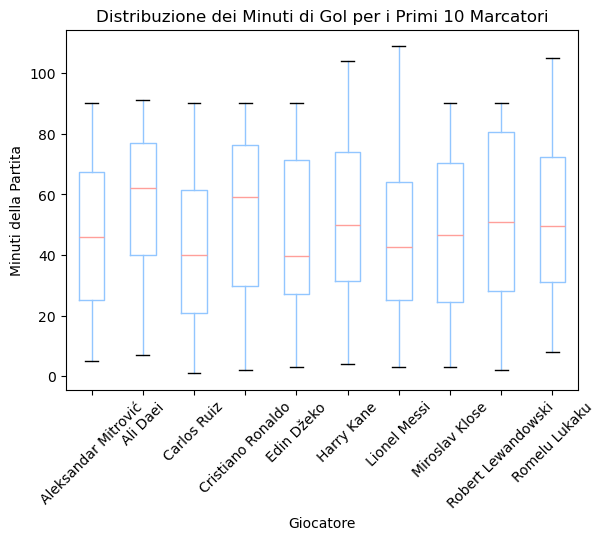

In [30]:
top_scorers = dati_goalscorers['scorer'].value_counts().head(10).index.tolist()

top_scorer_goals = dati_goalscorers[dati_goalscorers['scorer'].isin(top_scorers)]

plt.figure(figsize=(12, 8))
top_scorer_goals.boxplot(column='minute', by='scorer', grid=False)
plt.xlabel('Giocatore')
plt.ylabel('Minuti della Partita')
plt.title('Distribuzione dei Minuti di Gol per i Primi 10 Marcatori')
plt.suptitle('') 
plt.xticks(rotation=45)
plt.show()

## I 20 club con il maggior di giocatori a UEFA EURO 2024

Club
Manchester City        13
Inter Milan            13
FC Barcelona           12
Real Madrid            12
Paris Saint-Germain    12
RB Leipzig             11
Bayern Munich          11
Bayer 04 Leverkusen    10
Arsenal FC             10
Liverpool FC            9
Juventus FC             9
SK Slavia Prague        9
AS Roma                 9
VfL Wolfsburg           8
AC Milan                8
Fenerbahce              8
Manchester United       8
Bologna FC 1909         8
Atlético de Madrid      7
Feyenoord Rotterdam     7
Name: count, dtype: int64


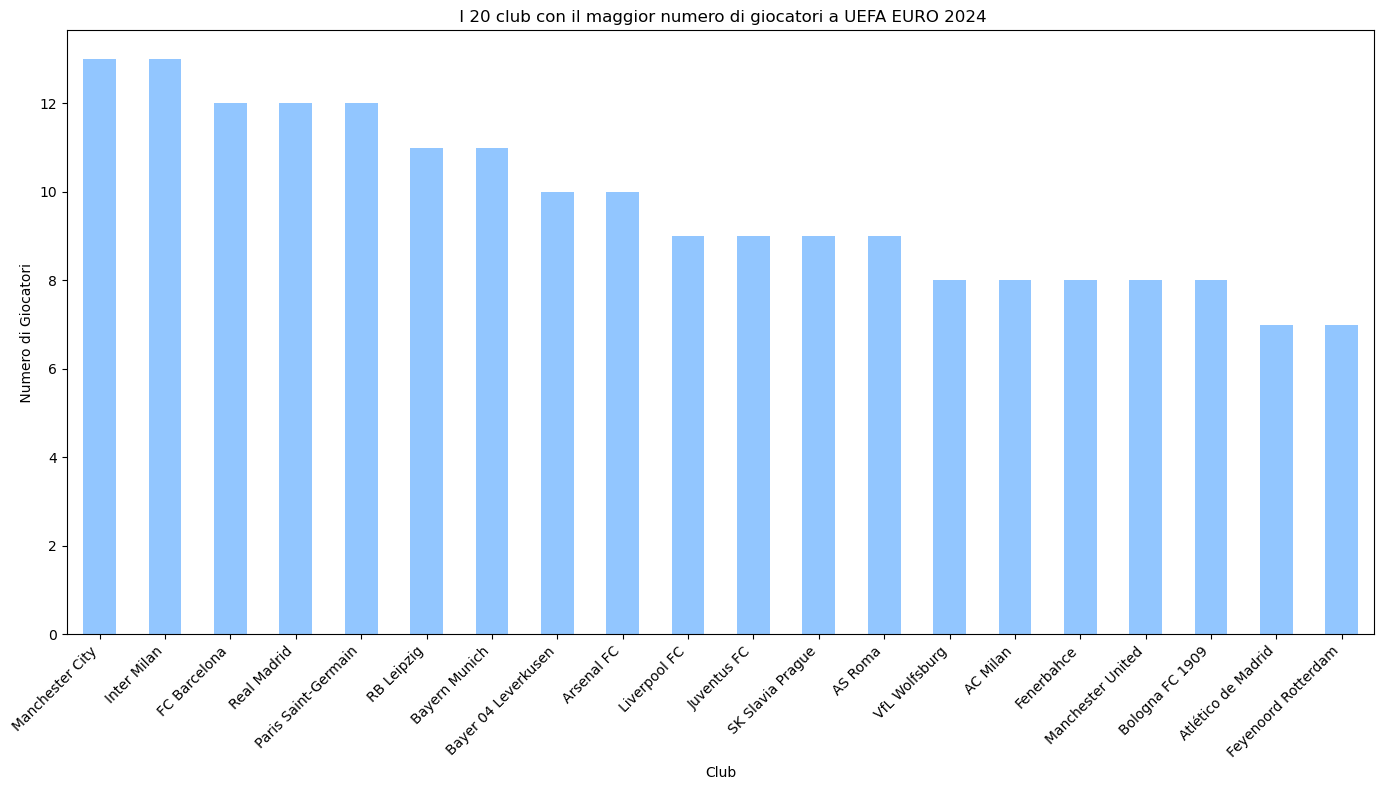

In [33]:
club_counts = dati_giocatori_euro24 ['Club'].value_counts()

top_clubs = club_counts.head(20)
print(top_clubs)

plt.figure(figsize=(14, 8))
top_clubs.plot(kind='bar')
plt.title(' I 20 club con il maggior numero di giocatori a UEFA EURO 2024')
plt.xlabel('Club')
plt.ylabel(' Numero di Giocatori ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Relazione tra il valore di mercato totale e la posizione FIFA

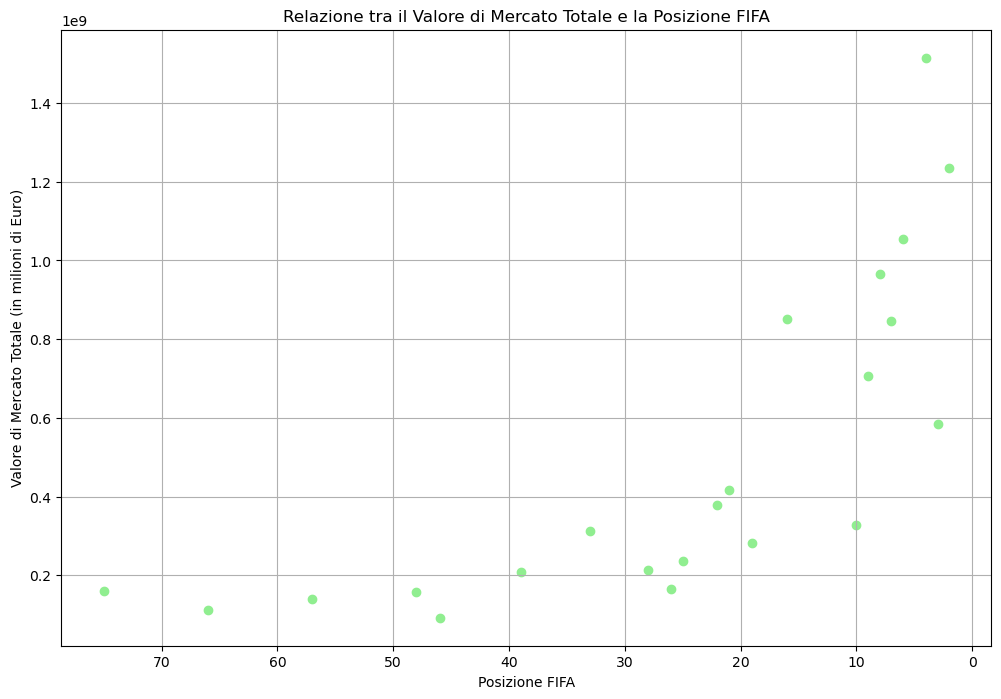

In [36]:
team_marketValue = dati_giocatori_euro24.groupby('Country')['MarketValue'].sum().reset_index()
team_marketValue.columns = ['Country', 'Valore di Mercato Totale']

merge_data = pd.merge(dati_fifaRank, team_marketValue, on='Country')

plt.figure(figsize=(12, 8))
plt.scatter(merge_data['rank'], merge_data['Valore di Mercato Totale'],color='lightgreen')
plt.title('Relazione tra il Valore di Mercato Totale e la Posizione FIFA')
plt.xlabel('Posizione FIFA')
plt.ylabel('Valore di Mercato Totale (in milioni di Euro)')
plt.gca().invert_xaxis() 
plt.grid(True)
plt.show()

## Distribuzione dell'Età per Posizione

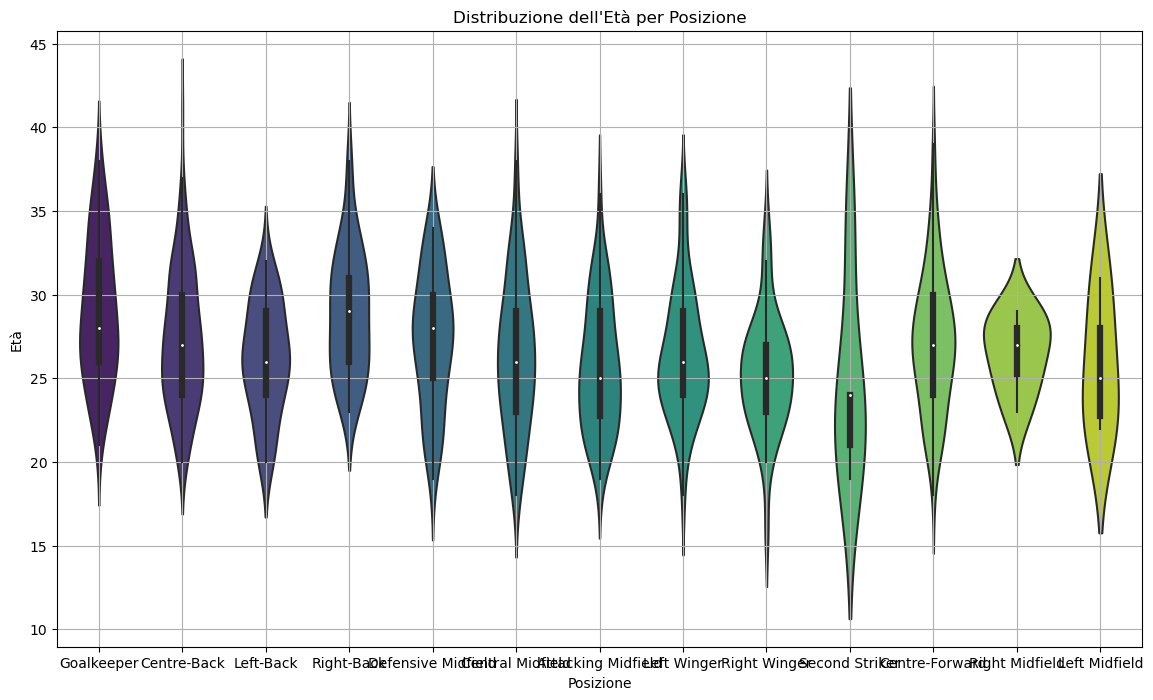

In [39]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=dati_giocatori_euro24, x='Position', y='Age', palette='viridis')
plt.title('Distribuzione dell\'Età per Posizione')
plt.xlabel('Posizione')
plt.ylabel('Età')
plt.grid(True)
plt.show()

## La relazione tra età, valore di mercato e numero di gol

<Axes: xlabel='Goals', ylabel='MarketValue'>

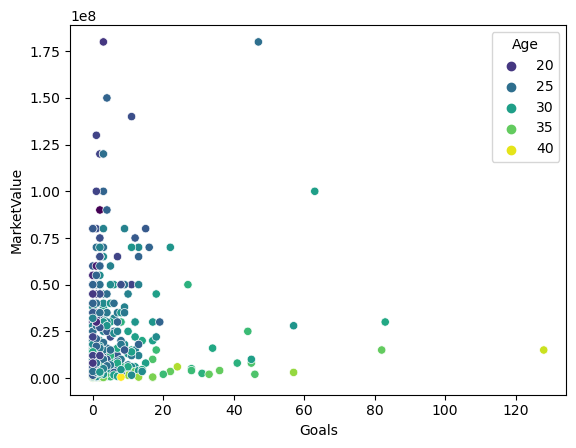

In [43]:
sns.scatterplot(data=dati_giocatori_euro24, x='Goals', y='MarketValue', hue='Age', palette='viridis')